In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
train=pd.read_csv('train_PDjVQMB.csv')
test=pd.read_csv('test_lTY72QC.csv')

In [3]:
train_og=train.copy() 
test_og=test.copy()

In [4]:
train.sample(5)

,ID,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn
1488,a3590727,25,Male,Less than 5L,145636.56,2,1,2,1,Poor,0
4378,d90e97e0,60,Male,More than 15L,1277648.82,3,1,2,0,Average,0
6037,19c1306f,38,Female,10L - 15L,623491.56,4,0,1,1,Poor,0
3324,3905fcf0,59,Female,10L - 15L,990926.10,0,1,2,1,Poor,0
3671,376f4aca,25,Male,More than 15L,1671563.79,2,1,1,0,Poor,0


In [5]:
train.head()

,ID,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn
0,84e2fcc9,36,Female,5L - 10L,563266.44,4,0,1,0,Average,1
1,57fea15e,53,Female,Less than 5L,875572.11,2,1,1,1,Poor,0
2,8df34ef3,35,Female,More than 15L,701607.06,2,1,2,0,Poor,0
3,c5c0788b,43,Female,More than 15L,1393922.16,0,1,2,1,Poor,1
4,951d69c4,39,Female,More than 15L,893146.23,1,1,1,1,Good,1


In [6]:
train.shape , test.shape

((6650, 11), (2851, 10))

In [7]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6650 entries, 0 to 6649
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  6650 non-null   object 
 1   Age                 6650 non-null   int64  
 2   Gender              6650 non-null   object 
 3   Income              6650 non-null   object 
 4   Balance             6650 non-null   float64
 5   Vintage             6650 non-null   int64  
 6   Transaction_Status  6650 non-null   int64  
 7   Product_Holdings    6650 non-null   object 
 8   Credit_Card         6650 non-null   int64  
 9   Credit_Category     6650 non-null   object 
 10  Is_Churn            6650 non-null   int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 571.6+ KB
None


In [8]:
train.isnull().sum()

ID                    0
Age                   0
Gender                0
Income                0
Balance               0
Vintage               0
Transaction_Status    0
Product_Holdings      0
Credit_Card           0
Credit_Category       0
Is_Churn              0
dtype: int64

In [9]:
train.nunique() # unique values in the respective columns

ID                    6650
Age                     52
Gender                   2
Income                   4
Balance               6643
Vintage                  6
Transaction_Status       2
Product_Holdings         3
Credit_Card              2
Credit_Category          3
Is_Churn                 2
dtype: int64

In [10]:
train.duplicated().sum() # no  duplicates values

0

In [11]:
train.isnull().sum() # no null values

ID                    0
Age                   0
Gender                0
Income                0
Balance               0
Vintage               0
Transaction_Status    0
Product_Holdings      0
Credit_Card           0
Credit_Category       0
Is_Churn              0
dtype: int64

In [12]:
train.describe()

,Age,Balance,Vintage,Transaction_Status,Credit_Card,Is_Churn
count,6650.000000,6.650000e+03,6650.000000,6650.000000,6650.000000,6650.000000
mean,41.130226,8.045954e+05,2.250226,0.515789,0.664361,0.231128
std,9.685747,5.157549e+05,1.458795,0.499788,0.472249,0.421586
min,21.000000,6.300000e+01,0.000000,0.000000,0.000000,0.000000
25%,34.000000,3.922642e+05,1.000000,0.000000,0.000000,0.000000
50%,40.000000,7.649386e+05,2.000000,1.000000,1.000000,0.000000
75%,47.000000,1.147124e+06,3.000000,1.000000,1.000000,0.000000
max,72.000000,2.436616e+06,5.000000,1.000000,1.000000,1.000000


In [13]:
train.dtypes

ID                     object
Age                     int64
Gender                 object
Income                 object
Balance               float64
Vintage                 int64
Transaction_Status      int64
Product_Holdings       object
Credit_Card             int64
Credit_Category        object
Is_Churn                int64
dtype: object

Product_Holdings, Credit_Category, Vintage, Income are ordinal data.

Gender, Transaction_Status, Credit_Card and Is_Churn are categorical data.

Age and Balance are numerical data. 

# Univariate Analysis

### Categorical data

Target variable

<AxesSubplot:title={'center':'Is_Churn'}>

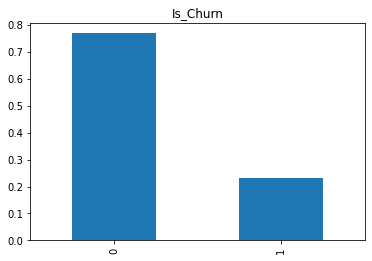

In [14]:
 train['Is_Churn'].value_counts(normalize=True).plot.bar(title='Is_Churn')

Around 22% customers will churn after 6 months.


Indepentent variables

<function matplotlib.pyplot.show(close=None, block=None)>

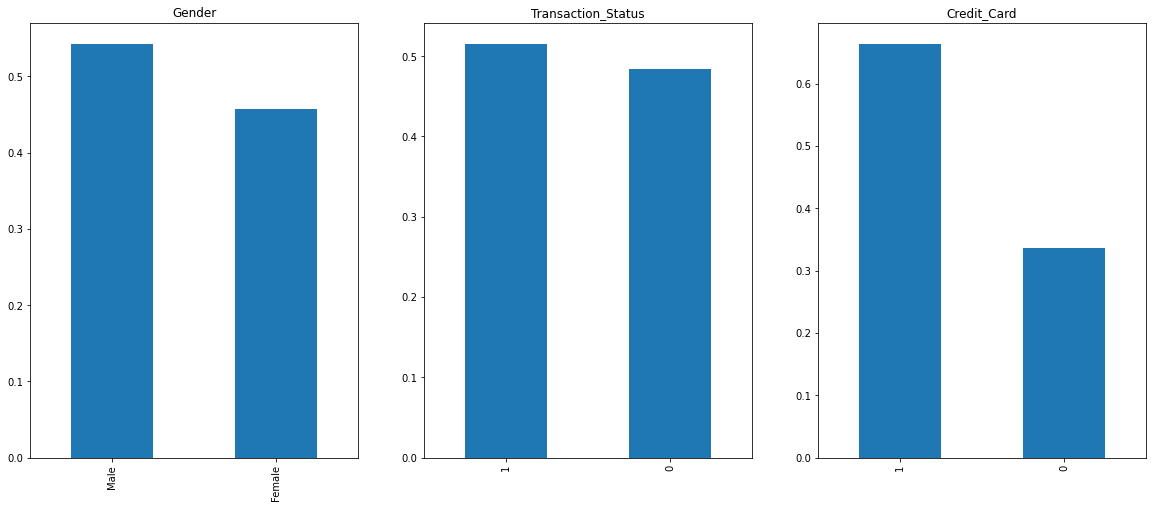

In [15]:
plt.figure(1) 
plt.subplot(131)
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,8),title='Gender')
plt.subplot(132)
train['Transaction_Status'].value_counts(normalize=True).plot.bar(title='Transaction_Status')
plt.subplot(133)
train['Credit_Card'].value_counts(normalize=True).plot.bar(title='Credit_Card')
plt.show

It can be inferred from above bar plots that:

1) Aound 55% of customers are male and 45% are female.

2) There is not much difference between transaction status in tha last 3 months ie percentage of transaction(51%) and no transaction(48%) in past 3 months are similar. 

3) Around 65% of the customers have credit card. 

Now, let's vizualize the Ordinal variables.

### Ordinal Data

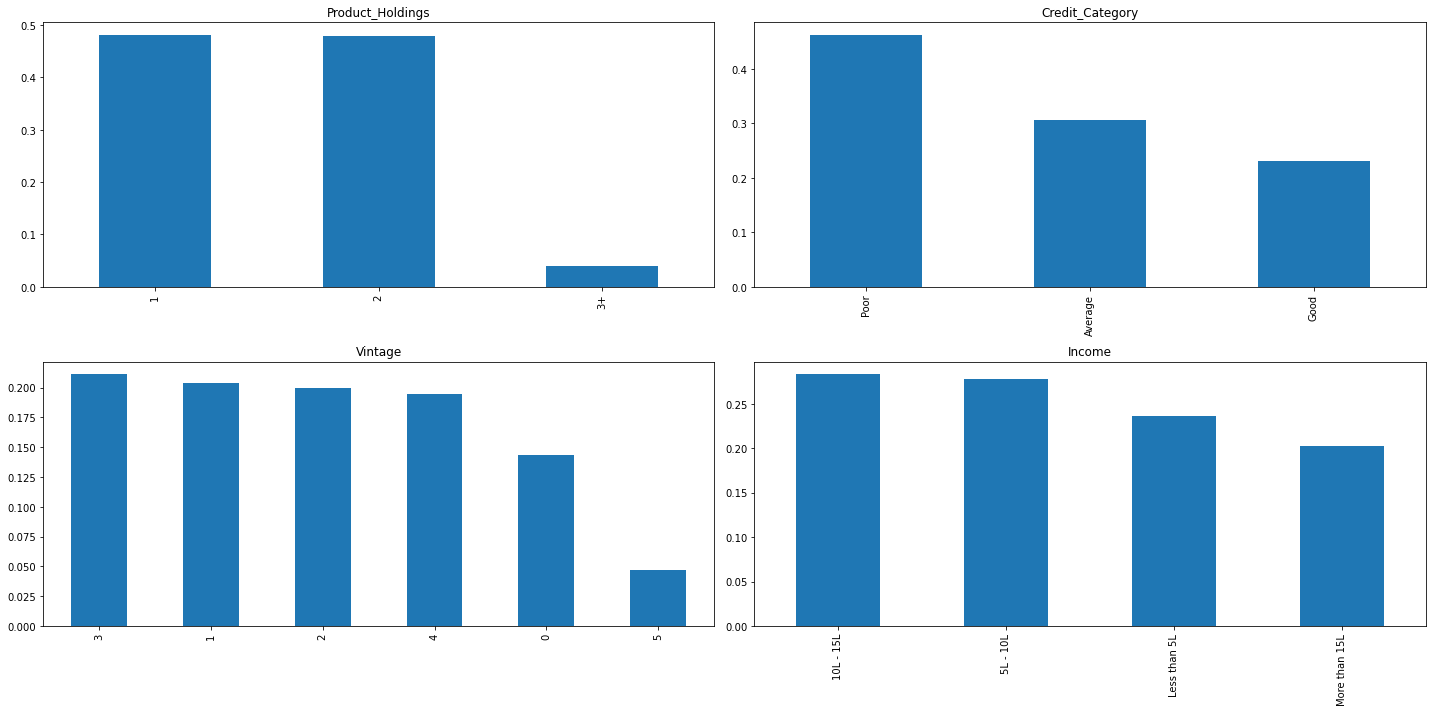

In [16]:
plt.figure(1) 
plt.subplot(221)
train['Product_Holdings'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Product_Holdings')
plt.subplot(222)
train['Credit_Category'].value_counts(normalize=True).plot.bar(title='Credit_Category')
plt.subplot(223)
train['Vintage'].value_counts(normalize=True).plot.bar(title='Vintage')
plt.subplot(224)
train['Income'].value_counts(normalize=True).plot.bar(title='Income')
plt.show 
plt.tight_layout()

Following inferences can be made from the above bar graphs:

1) Customers holding 1 and 2 products with the bank have are almost similar (around 49%).

2) Most of the customers have poor credit category(poor credit score).

3) In Vintage graph ie number of years the customer is associated with the bank, least no of customers are associated with the bank for the past 5 years(around 4%), and around 14% are new customers(0 years), and rest having similar percentage of years of  association with the bank(around 20%).

4) Most of the customers have income range of 10L-15L and 5L-10L.

Now, let's check the numerical data


### Numerical Data

In [17]:
train.describe()

,Age,Balance,Vintage,Transaction_Status,Credit_Card,Is_Churn
count,6650.000000,6.650000e+03,6650.000000,6650.000000,6650.000000,6650.000000
mean,41.130226,8.045954e+05,2.250226,0.515789,0.664361,0.231128
std,9.685747,5.157549e+05,1.458795,0.499788,0.472249,0.421586
min,21.000000,6.300000e+01,0.000000,0.000000,0.000000,0.000000
25%,34.000000,3.922642e+05,1.000000,0.000000,0.000000,0.000000
50%,40.000000,7.649386e+05,2.000000,1.000000,1.000000,0.000000
75%,47.000000,1.147124e+06,3.000000,1.000000,1.000000,0.000000
max,72.000000,2.436616e+06,5.000000,1.000000,1.000000,1.000000


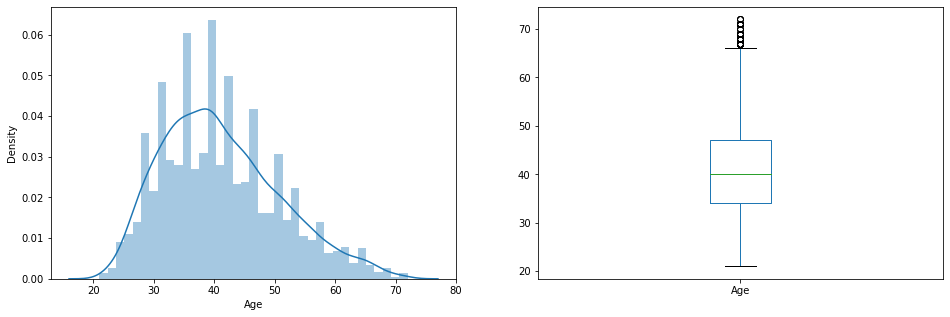

In [18]:
plt.figure(1) 
plt.subplot(121)
sns.distplot(train['Age'])
plt.subplot(122)
train['Age'].plot.box(figsize=(16,5))
plt.show()

The distribution of age is fairly normal, and the box plot shows that there are some outliers.

<AxesSubplot:>

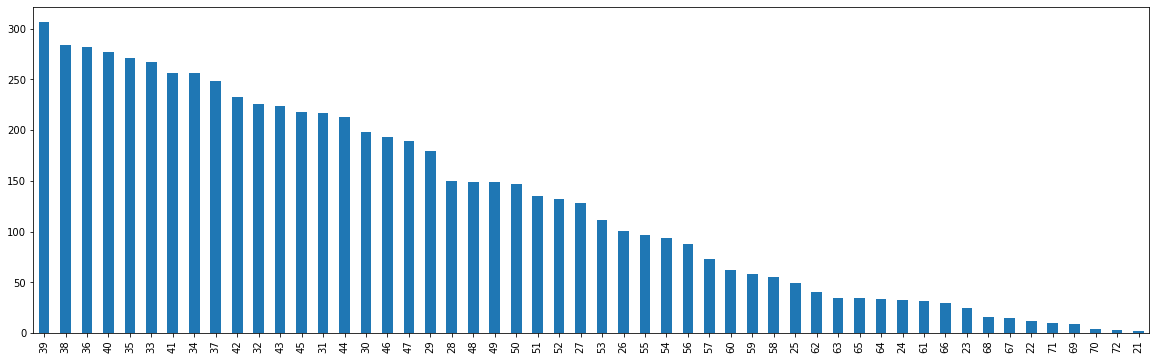

In [19]:
train["Age"].value_counts().plot.bar(figsize=(20,6)) 

most of the customers are from the age group 30-40

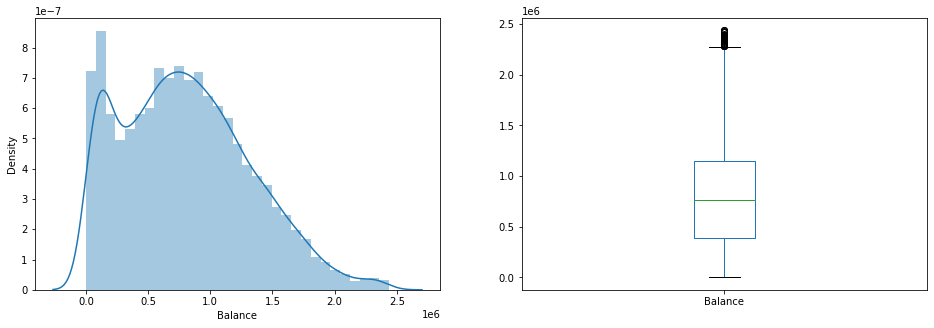

In [20]:
plt.figure(1) 
plt.subplot(121)
sns.distplot(train['Balance'])
plt.subplot(122)
train['Balance'].plot.box(figsize=(16,5))
plt.show()

The dstribution of Balance is not normal, it has two peaks, and has some outliers as shown in it's box plot.

# Bivariate Analysis

### Now we would like to know how well each feature correlate with Is_Churn

Assumptions:


Customers with no transaction in the past 3 months are likely to churn after 6 months.

Customers with no credit card are likely to churn.

Customers with poor Credit_Category are likely to churn.

#### Categorical features with target Variable (Is_churn)

<AxesSubplot:xlabel='Gender'>

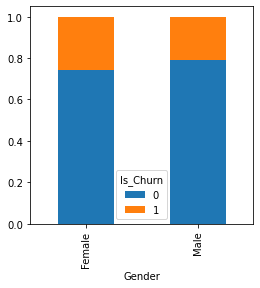

In [21]:
Gender=pd.crosstab(train['Gender'],train['Is_Churn'])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))

It can be inferred that churn rate of females is slightly  more than males.

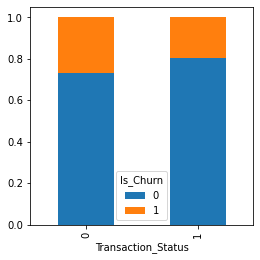

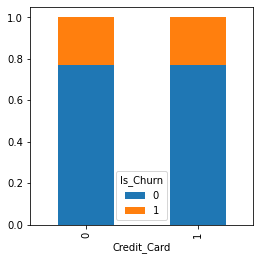

In [22]:
Transaction_Status=pd.crosstab(train['Transaction_Status'],train['Is_Churn'])
Credit_Card=pd.crosstab(train['Credit_Card'],train['Is_Churn'])
Transaction_Status.div(Transaction_Status.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()
Credit_Card.div(Credit_Card.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()

Proportion of customers  with no transaction in the past 3 months are more likely to churn in the next 6 months.

there is nothing significant we can infer from the customers having credit card or not. 

#### ordinal features with target variable

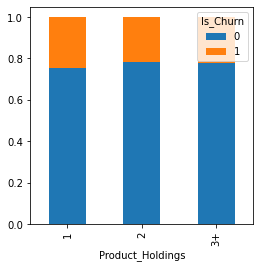

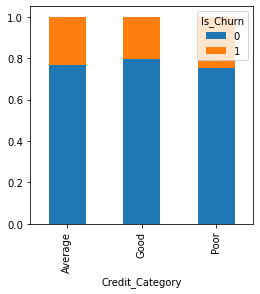

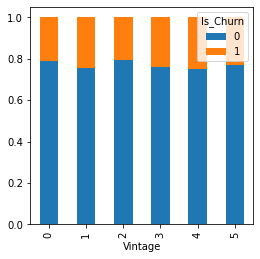

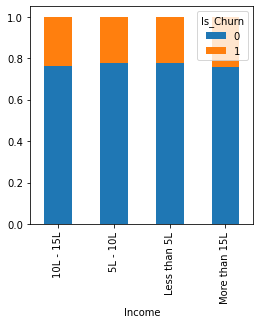

In [23]:
Product_Holdings=pd.crosstab(train['Product_Holdings'],train['Is_Churn'])
Credit_Category=pd.crosstab(train['Credit_Category'],train['Is_Churn'])
Vintage=pd.crosstab(train['Vintage'],train['Is_Churn'])
Income=pd.crosstab(train['Income'],train['Is_Churn'])
Product_Holdings.div(Product_Holdings.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()
Credit_Category.div(Credit_Category.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()
Vintage.div(Vintage.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()
Income.div(Income.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()

In [24]:
Income.div(Income.sum(1).astype(float),axis=0)

Is_Churn,0,1
Income,,
10L - 15L,0.764456,0.235544
5L - 10L,0.776936,0.223064
Less than 5L,0.774952,0.225048
More than 15L,0.756877,0.243123


Customers with 1 product holding are more likely to churn in next 6 months.

Customers with average and poor credit category are more likely to churn in next 6 months.

for Vintage the chustomers from 0 and 2 years of association with the bank are less likely to churn.

customers with Income more than 15L and 10L - 15L (ie with high icome range) are more likely churn.

#### Numerical features with Target variable

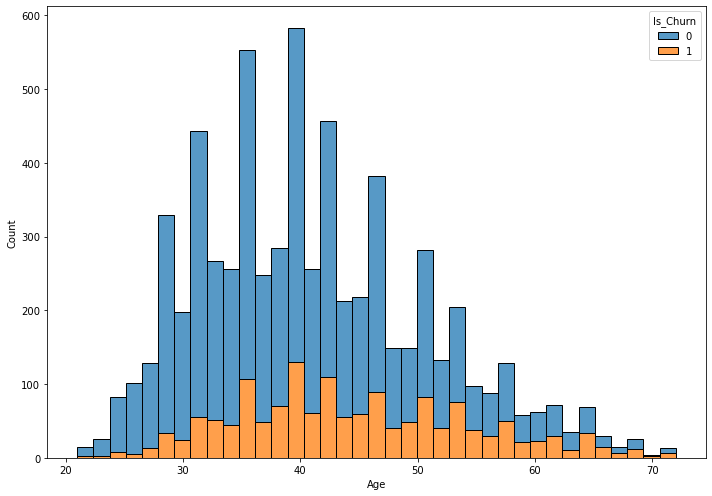

In [25]:
# using seaborn
fig, axs = plt.subplots(1, 1,
                        figsize =(10, 7),
                        tight_layout = True)
 
sns.histplot(data=train, x="Age", hue="Is_Churn", multiple="stack")
plt.show()

In [26]:
train.describe()

,Age,Balance,Vintage,Transaction_Status,Credit_Card,Is_Churn
count,6650.000000,6.650000e+03,6650.000000,6650.000000,6650.000000,6650.000000
mean,41.130226,8.045954e+05,2.250226,0.515789,0.664361,0.231128
std,9.685747,5.157549e+05,1.458795,0.499788,0.472249,0.421586
min,21.000000,6.300000e+01,0.000000,0.000000,0.000000,0.000000
25%,34.000000,3.922642e+05,1.000000,0.000000,0.000000,0.000000
50%,40.000000,7.649386e+05,2.000000,1.000000,1.000000,0.000000
75%,47.000000,1.147124e+06,3.000000,1.000000,1.000000,0.000000
max,72.000000,2.436616e+06,5.000000,1.000000,1.000000,1.000000


In [27]:
train.dtypes

ID                     object
Age                     int64
Gender                 object
Income                 object
Balance               float64
Vintage                 int64
Transaction_Status      int64
Product_Holdings       object
Credit_Card             int64
Credit_Category        object
Is_Churn                int64
dtype: object

Text(0, 0.5, 'Percentage')

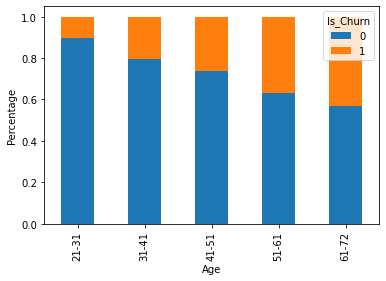

In [28]:
# Age wrt Is_churn plot  
bins=[21,31,41,51,61,72]
groups=['21-31','31-41','41-51','51-61','61-72' ]
train['Agecs']=pd.cut(train['Age'],bins,labels=groups)
Ages=pd.crosstab(train['Agecs'],train['Is_Churn'])
Ages.div(Ages.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.xlabel('Age')
plt.ylabel('Percentage')

It can be inferred that in the age group 61-72 has more churn percentage

Text(0, 0.5, 'Percentage')

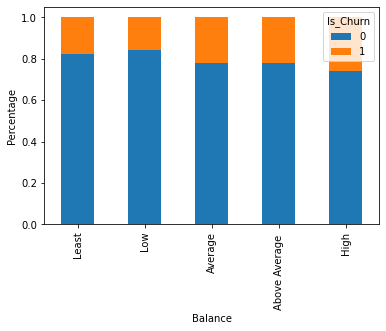

In [29]:
bins=[63.0, 5000.0, 50000.0, 800000.0, 1000000.0, 2436616.0]
groups=['Least','Low','Average','Above Average ','High' ]
train['Balance_cut']=pd.cut(train['Balance'],bins,labels=groups)
Balance_cut=pd.crosstab(train['Balance_cut'],train['Is_Churn'])
Balance_cut.div(Balance_cut.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.xlabel('Balance')
plt.ylabel('Percentage')

customer with high balance are more likely to churn .

## Multivariate Analysis

<AxesSubplot:xlabel='Income', ylabel='Balance'>

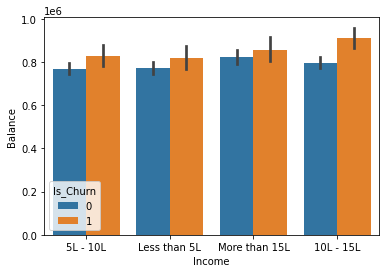

In [30]:
sns.barplot(x="Income", y="Balance", data=train,hue='Is_Churn') # effect of Income and Balance on Is_Churn

From above plot it can be inferred that customers with a higher balance and Income are more likely to churn which would be worrying to the bank as this impacts their source of loan capital.

<AxesSubplot:xlabel='Income', ylabel='Balance'>

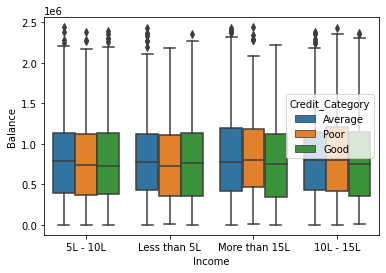

In [31]:
sns.boxplot(x="Income", y="Balance", data=train,hue='Credit_Category') # relation between Income,Balance and Credti_Category

customers with high income have more poor and average credit category, which might lead to churn. 

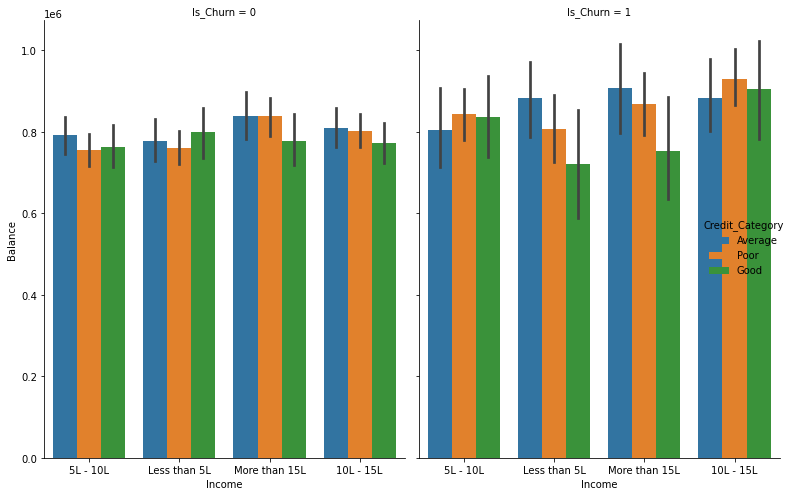

In [32]:
sns.catplot(x="Income", y="Balance",                 ## effect of Income,Balance and Credit_Category on Is_Churn
                hue="Credit_Category", col="Is_Churn",
                data=train, kind="bar",
                height=7, aspect=.7)
plt.tight_layout()

As per the assumption from above it can be seen higher income customers with poor and average credit category are more likely to churn.

In 10L-15L income and high balance with good credit category customers also churn.  

<AxesSubplot:xlabel='Gender', ylabel='Age'>

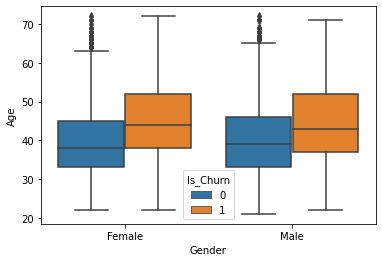

In [33]:
sns.boxplot(x="Gender", y="Age", data=train,hue='Is_Churn') # effect of age and Gender on Is_Churn 

Both male and female customers of the same age group are more likely to churn

Lets drop the columns which we created.

change 3+ in Product_Holdings feature to 3 to convert it to numerical variable.

In [34]:
train=train.drop(['Agecs','Balance_cut'],axis=1)
train['Product_Holdings'].replace('3+',3,inplace=True)
test['Product_Holdings'].replace('3+',3,inplace=True)

<AxesSubplot:>

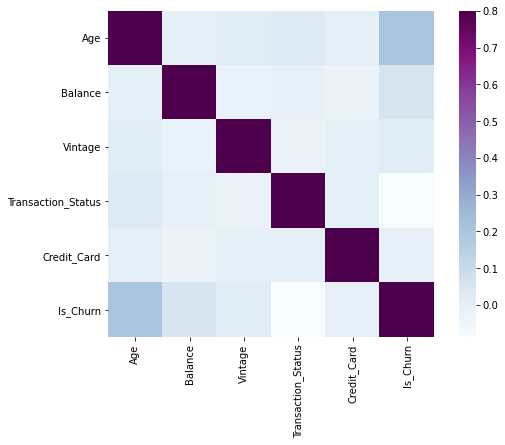

In [35]:
matrix=train.corr()
f,ax=plt.subplots(figsize=(9,6))
sns.heatmap(matrix,vmax=.8,square=True,cmap="BuPu")

correlation between Age and Is_Churn. 

## Feature Engineering

We seek to add features that are likely to have an impact on the probability of churning.

In [36]:
test.head()

,ID,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category
0,55480787,50,Female,More than 15L,1008636.39,2,1,2,1,Average
1,9aededf2,36,Male,5L - 10L,341460.72,2,0,2,1,Average
2,a5034a09,25,Female,10L - 15L,439460.10,0,0,2,1,Good
3,b3256702,41,Male,Less than 5L,28581.93,0,1,2,1,Poor
4,dc28adb5,48,Male,More than 15L,1104540.03,2,1,3,0,Good


In [37]:
z=[]
for i in range(len(train.Balance)):
        if train.Vintage[i] != 0:
            z.append(train.Balance[i]/train.Vintage[i]) 
    
        else:
            z.append(train.Balance[i]) # when vintage=0, we keep the balance 
        

<AxesSubplot:ylabel='Density'>

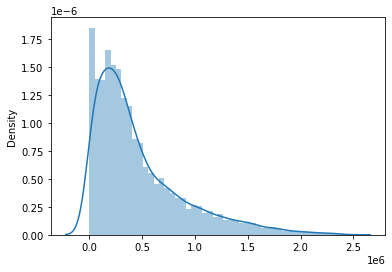

In [38]:
z=np.round(z,2)

sns.distplot(z)

In [39]:
train['balance_vintage']=z 

Balange(average quarterly balance) and Vintage(No. of years of associated with bank) are function of year therefore combining them by dividing balance with vintage(when vintage=0 keep the balance as it is) 

In [40]:
import scipy.stats as stats
import pylab

def normality(data,feature):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    sns.kdeplot(data[feature])
    plt.subplot(1,2,2)
    stats.probplot(data[feature],plot=pylab)
    plt.show()

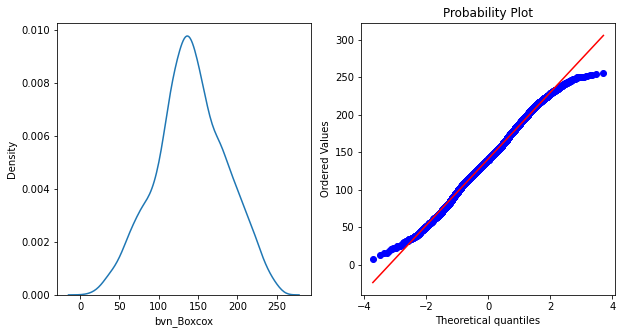

In [41]:
train['bvn_Boxcox'],parameters=stats.boxcox(train['balance_vintage'])
normality(train,'bvn_Boxcox')


<AxesSubplot:>

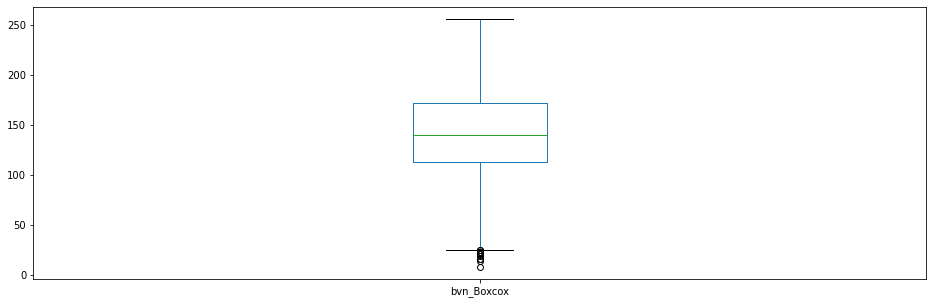

In [42]:
train['bvn_Boxcox'].plot.box(figsize=(16,5))

In [43]:
train.head()

,ID,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn,balance_vintage,bvn_Boxcox
0,84e2fcc9,36,Female,5L - 10L,563266.44,4,0,1,0,Average,1,140816.61,108.317348
1,57fea15e,53,Female,Less than 5L,875572.11,2,1,1,1,Poor,0,437786.06,152.665262
2,8df34ef3,35,Female,More than 15L,701607.06,2,1,2,0,Poor,0,350803.53,142.802150
3,c5c0788b,43,Female,More than 15L,1393922.16,0,1,2,1,Poor,1,1393922.16,216.158430
4,951d69c4,39,Female,More than 15L,893146.23,1,1,1,1,Good,1,893146.23,189.163188


## Outlier Treatment

one of the way to remove skewness is to take log transformation, it does not affect smaller values but reduces the larger values

In [44]:
train['logAge']=np.log(train['Age'])
train.logAge.min()

3.044522437723423

<AxesSubplot:xlabel='Age', ylabel='Density'>

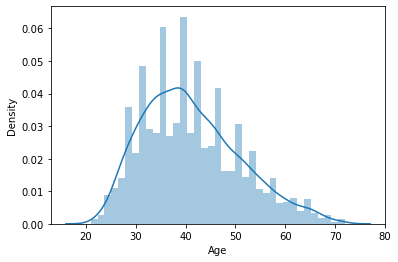

In [45]:
sns.distplot(train['Age'])

<AxesSubplot:xlabel='logAge', ylabel='Density'>

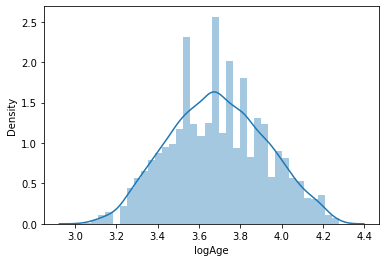

In [46]:
sns.distplot(train['logAge'])

In [47]:
train['logAge'].min(),train.shape

(3.044522437723423, (6650, 14))

In [48]:
train.describe()

,Age,Balance,Vintage,Transaction_Status,Credit_Card,Is_Churn,balance_vintage,bvn_Boxcox,logAge
count,6650.000000,6.650000e+03,6650.000000,6650.000000,6650.000000,6650.000000,6.650000e+03,6650.000000,6650.000000
mean,41.130226,8.045954e+05,2.250226,0.515789,0.664361,0.231128,4.656209e+05,140.919818,3.689540
std,9.685747,5.157549e+05,1.458795,0.499788,0.472249,0.421586,4.299846e+05,44.425197,0.233173
min,21.000000,6.300000e+01,0.000000,0.000000,0.000000,0.000000,6.300000e+01,8.112590,3.044522
25%,34.000000,3.922642e+05,1.000000,0.000000,0.000000,0.000000,1.608463e+05,112.783159,3.526361
50%,40.000000,7.649386e+05,2.000000,1.000000,1.000000,0.000000,3.271312e+05,139.822444,3.688879
75%,47.000000,1.147124e+06,3.000000,1.000000,1.000000,0.000000,6.435296e+05,171.430345,3.850148
max,72.000000,2.436616e+06,5.000000,1.000000,1.000000,1.000000,2.436436e+06,255.438211,4.276666


Follows Normal Distribution

<AxesSubplot:>

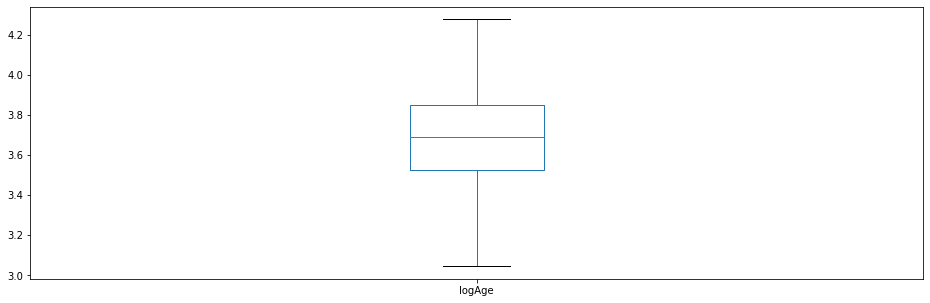

In [49]:
train['logAge'].plot.box(figsize=(16,5))

No Outliers as compared to age boxplot as shown below

<AxesSubplot:>

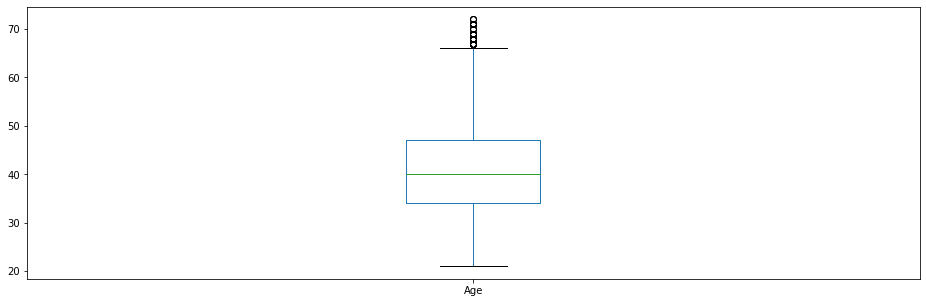

In [50]:
train['Age'].plot.box(figsize=(16,5))

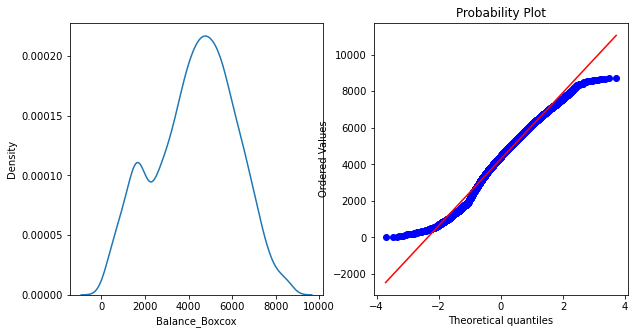

In [51]:
train['Balance_Boxcox'],parameters=stats.boxcox(train['Balance'])
normality(train,'Balance_Boxcox')


Follows Normal Distribution colsely as compared to Balance feature as shown below

<AxesSubplot:xlabel='Balance', ylabel='Density'>

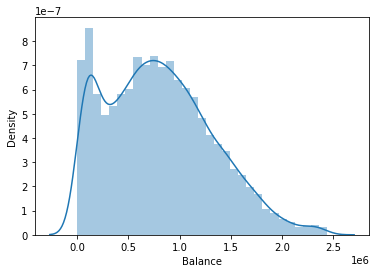

In [52]:
sns.distplot(train.Balance)

<AxesSubplot:>

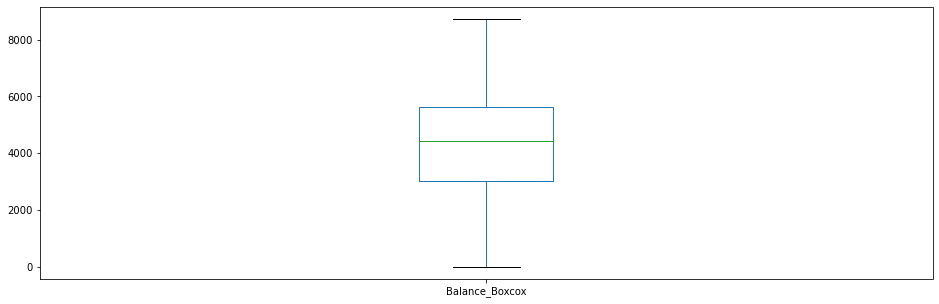

In [53]:
train['Balance_Boxcox'].plot.box(figsize=(16,5)) # removes Outliers

In [54]:
train.drop(['balance_vintage','Age','Balance',],axis=1,inplace=True) # dropping the features with outliers

In [55]:
train.head()

,ID,Gender,Income,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn,bvn_Boxcox,logAge,Balance_Boxcox
0,84e2fcc9,Female,5L - 10L,4,0,1,0,Average,1,108.317348,3.583519,3724.507097
1,57fea15e,Female,Less than 5L,2,1,1,1,Poor,0,152.665262,3.970292,4810.630744
2,8df34ef3,Female,More than 15L,2,1,2,0,Poor,0,142.802150,3.555348,4230.577316
3,c5c0788b,Female,More than 15L,0,1,2,1,Poor,1,216.158430,3.761200,6299.976511
4,951d69c4,Female,More than 15L,1,1,1,1,Good,1,189.163188,3.663562,4866.406096


## Test Data Transformation

In [56]:
z=[]
for i in range(len(test.Balance)):
        if test.Vintage[i] != 0:
            z.append(test.Balance[i]/test.Vintage[i]) 
    
        else:
            z.append(test.Balance[i]) # when vintage=0, we keep the balance


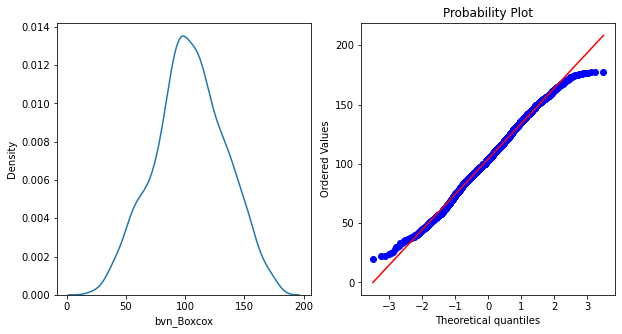

In [57]:
z=np.round(z,2)
test['balance_vintage']=z
test['bvn_Boxcox'],parameters=stats.boxcox(test['balance_vintage'])
normality(test,'bvn_Boxcox')


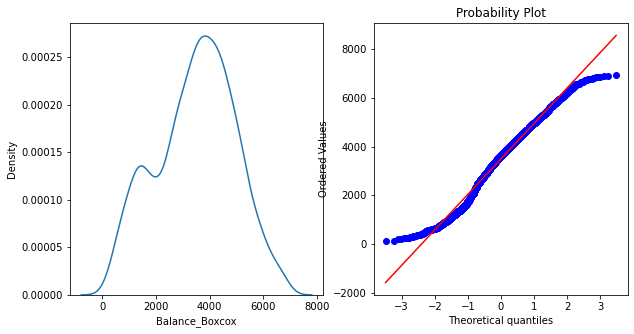

In [58]:
test['logAge']=np.log(test['Age'])
test['Balance_Boxcox'],parameters=stats.boxcox(test['Balance'])
normality(test,'Balance_Boxcox')

In [59]:
test.drop(['Age','Balance'],axis=1,inplace=True)

In [60]:
test.drop(['balance_vintage'],axis=1,inplace=True)

In [61]:
test.head()

,ID,Gender,Income,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,bvn_Boxcox,logAge,Balance_Boxcox
0,55480787,Female,More than 15L,2,1,2,1,Average,116.492052,3.912023,4215.210299
1,9aededf2,Male,5L - 10L,2,0,2,1,Average,86.664378,3.583519,2292.169132
2,a5034a09,Female,10L - 15L,0,0,2,1,Good,112.213260,3.218876,2641.726554
3,b3256702,Male,Less than 5L,0,1,2,1,Poor,52.726962,3.713572,567.123409
4,dc28adb5,Male,More than 15L,2,1,3,0,Good,119.401295,3.871201,4436.110061


# Model

In [62]:
train = train.drop('ID',axis=1)
test=test.drop('ID',axis=1)

In [63]:
x=train.drop("Is_Churn",1)
y=train['Is_Churn']

In [64]:
x=pd.get_dummies(x)
train=pd.get_dummies(train)
test=pd.get_dummies(test)

In [65]:
x.head()

,Vintage,Transaction_Status,Credit_Card,bvn_Boxcox,logAge,Balance_Boxcox,Gender_Female,Gender_Male,Income_10L - 15L,Income_5L - 10L,Income_Less than 5L,Income_More than 15L,Product_Holdings_3,Product_Holdings_1,Product_Holdings_2,Credit_Category_Average,Credit_Category_Good,Credit_Category_Poor
0,4,0,0,108.317348,3.583519,3724.507097,1,0,0,1,0,0,0,1,0,1,0,0
1,2,1,1,152.665262,3.970292,4810.630744,1,0,0,0,1,0,0,1,0,0,0,1
2,2,1,0,142.802150,3.555348,4230.577316,1,0,0,0,0,1,0,0,1,0,0,1
3,0,1,1,216.158430,3.761200,6299.976511,1,0,0,0,0,1,0,0,1,0,0,1
4,1,1,1,189.163188,3.663562,4866.406096,1,0,0,0,0,1,0,1,0,0,1,0


In [66]:
# Support functions
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform

# Fit models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
#from xgboost import XGBClassifier

# Scoring functions
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [67]:
def best_model(model):
    print(model.best_score_)    
    print(model.best_params_)
    print(model.best_estimator_)

In [68]:
from sklearn.metrics import f1_score
from imblearn.over_sampling import RandomOverSampler

In [69]:
ros = RandomOverSampler(random_state=0) #Over sampling to make the prediction accurate
xrs, yrs= ros.fit_resample(x, y)

In [70]:
from sklearn.model_selection import train_test_split
xtrr,xcvv,ytrr,ycvv = train_test_split(xrs,yrs,test_size=0.2)

### Logistic Model

In [71]:
param_grid = {'C': [10,50,100], 'max_iter': [250,350,500], 'fit_intercept':[True],'intercept_scaling':[1],
              'penalty':['l2'], 'tol':[0.00001,0.0001,0.000001]}
log_primal_Grid = GridSearchCV(LogisticRegression(solver='lbfgs'),param_grid, cv=7, refit=True, verbose=0)
log_primal_Grid.fit(xtrr,ytrr)
best_model(log_primal_Grid)

0.5616140168642307
{'C': 100, 'fit_intercept': True, 'intercept_scaling': 1, 'max_iter': 250, 'penalty': 'l2', 'tol': 1e-05}
LogisticRegression(C=100, max_iter=250, tol=1e-05)


In [72]:
log_primal = LogisticRegression(C=50, class_weight=None, dual=False, fit_intercept=True,intercept_scaling=1, max_iter=250,n_jobs=None, 
                                penalty='l2', random_state=None, solver='lbfgs',tol=1e-05, verbose=0, warm_start=False)
log_primal.fit(xtrr,ytrr)

LogisticRegression(C=50, max_iter=250, tol=1e-05)

In [73]:
f1_score(ycvv, log_primal.predict(xcvv), average='macro')

0.5748909416733714

### Random Forest Classifier

In [74]:
from sklearn.model_selection import RandomizedSearchCV

In [75]:
param_grid = {'max_depth': [8,10,15,17], 'max_features': [2,4,6,7,8,9],'n_estimators':[50,100],'min_samples_split': [3, 5, 6, 7]}
random_search=RandomizedSearchCV(RandomForestClassifier(),param_distributions=param_grid,n_iter=5)
random_search.fit(xtrr,ytrr)
best_model(random_search)

0.8328850855745721
{'n_estimators': 100, 'min_samples_split': 6, 'max_features': 8, 'max_depth': 15}
RandomForestClassifier(max_depth=15, max_features=8, min_samples_split=6)


In [77]:
RF = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',max_depth=15, max_features=8, max_leaf_nodes=None,min_impurity_decrease=0.0,
                            min_samples_leaf=1, min_samples_split=6,min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
                            oob_score=False, random_state=None, verbose=0,warm_start=False)
RF.fit(xtrr,ytrr)

RandomForestClassifier(max_depth=15, max_features=8, min_samples_split=6)

In [78]:
f1_score(ycvv, RF.predict(xcvv), average='macro')

0.8569288186113214

### RandomForestClassifier (trial and error for parameters)

In [110]:
# Fit Random Forest classifier
RF1 = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',max_depth=20, max_features=7, max_leaf_nodes=None,min_impurity_decrease=0.0,
                            min_samples_leaf=1, min_samples_split=4,min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=None,
                            oob_score=False, random_state=None, verbose=0,warm_start=False)
RF1.fit(xtrr,ytrr)

RandomForestClassifier(max_depth=20, max_features=7, min_samples_split=4,
                       n_estimators=150)

In [111]:
f1_score(ycvv, RF1.predict(xcvv), average='macro') # better score on leaderboard

0.8929053015751056

In [112]:
submission1=pd.read_csv('sample_OoSmYo5.csv')

In [113]:
tspr=RF1.predict(test)

In [114]:
submission1['Is_Churn']=tspr
submission1['ID']=test_og['ID']

In [115]:
pd.DataFrame(submission1,columns=['ID','Is_Churn']).to_csv('RFt.csv',index=False)

In [117]:
submission2=pd.read_csv('sample_OoSmYo5.csv')
subm=submission2

In [118]:
tspr=RF.predict(test)

In [119]:
subm['Is_Churn']=tspr
subm['ID']=test_og['ID']

In [120]:
pd.DataFrame(submission2,columns=['ID','Is_Churn']).to_csv('RFrgcup.csv',index=False)

### feature importance

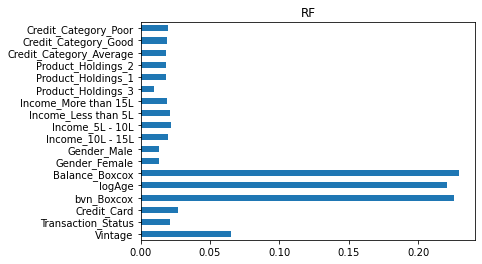

In [121]:
ftrimp=pd.Series(RF.feature_importances_ ,index=x.columns)
ftrimp.plot(kind='barh')
plt.title('RF')
plt.show()

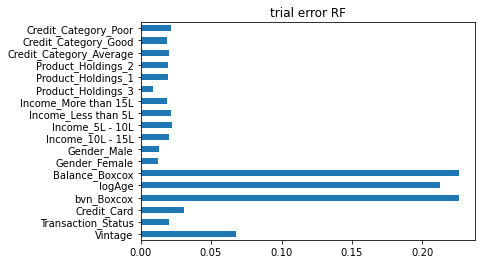

In [122]:
ftrimp=pd.Series(RF1.feature_importances_ ,index=x.columns)
ftrimp.plot(kind='barh')
plt.title('trial error RF')
plt.show()

from the above graph it can be seen that the variable created in Feature engineering (bvn_Boxcox) and the transformed variable (logAge, Balance_Boxcox)  are playing important role in prediction.

### XGB Classifier

In [123]:
from xgboost import XGBClassifier

In [124]:
model=XGBClassifier(base_score=0.5, booster='gbtree',n_estimators=180, max_depth=20,gamma=0.01, learning_rate=0.7)
model.fit(xtrr,ytrr)
pred_test=model.predict(xcvv)

[23:36:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [125]:
f1_score(ycvv, pred_test, average='macro')

0.8856216457960644

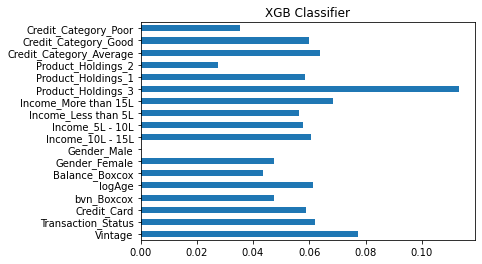

In [126]:
ftrimp=pd.Series(model.feature_importances_ ,index=x.columns)
ftrimp.plot(kind='barh')
plt.title('XGB Classifier')
plt.show()

In [127]:
submission3=pd.read_csv('sample_OoSmYo5.csv')

In [128]:
tspr=model.predict(test)

In [129]:
submission3['Is_Churn']=tspr
submission3['ID']=test_og['ID']

In [130]:
pd.DataFrame(submission3,columns=['ID','Is_Churn']).to_csv('XGBup.csv',index=False)